# Analyse factorielle des correspondances multiples



!!! Compléter les références !!!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sqlite3 as sql

In [3]:
from fanalysis.ca import CA 
from fanalysis.mca import MCA

In [4]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/observations_900.csv'

obs = pd.read_csv(path)
obs.set_index('id', inplace=True)
obs.head()

,age,gender,revenu_mensuel,lecture_journal,parti
id,,,,,
1,87,F,9410,trois-quatre fois par semaine,populiste
2,31,H,4466,de temps en temps,gauche
3,79,F,7515,trois-quatre fois par semaine,populiste
4,26,H,3376,le week-end,écologiste
5,75,F,3296,trois-quatre fois par semaine,droite


In [5]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec un découpage significatif au point de vue heuristique, et modifiable si besion
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [18, 26, 36, 46, 56, 66, 91]
c_obs = obs.copy(deep=True)
c_obs['generation'] = pd.cut(c_obs['age'], generations, right=False)
c_obs['generation'] = c_obs['generation'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))\
       .astype(dtype='str')
# Inspection
c_obs.head()

,age,gender,revenu_mensuel,lecture_journal,parti,generation
id,,,,,,
1,87,F,9410,trois-quatre fois par semaine,populiste,66-90
2,31,H,4466,de temps en temps,gauche,26-35
3,79,F,7515,trois-quatre fois par semaine,populiste,66-90
4,26,H,3376,le week-end,écologiste,26-35
5,75,F,3296,trois-quatre fois par semaine,droite,66-90


In [6]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec un découpage significatif au point de vue heuristique, et modifiable si besion
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

classes_revenu = [0,3000, 4500, 6000, 8000, 10000, 12000, 300000]
c_obs['classe_revenu'] = pd.cut(c_obs['revenu_mensuel'], classes_revenu, right=False)
c_obs['classe_revenu'] = c_obs['classe_revenu']\
    .apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1)).astype(dtype='str')

# Inspection
c_obs.head()

,age,gender,revenu_mensuel,lecture_journal,parti,generation,classe_revenu
id,,,,,,,
1,87,F,9410,trois-quatre fois par semaine,populiste,66-90,8000-9999
2,31,H,4466,de temps en temps,gauche,26-35,3000-4499
3,79,F,7515,trois-quatre fois par semaine,populiste,66-90,6000-7999
4,26,H,3376,le week-end,écologiste,26-35,3000-4499
5,75,F,3296,trois-quatre fois par semaine,droite,66-90,3000-4499


In [7]:
c_obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 1 to 900
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              900 non-null    int64 
 1   gender           900 non-null    object
 2   revenu_mensuel   900 non-null    int64 
 3   lecture_journal  900 non-null    object
 4   parti            900 non-null    object
 5   generation       900 non-null    object
 6   classe_revenu    900 non-null    object
dtypes: int64(2), object(5)
memory usage: 56.2+ KB


In [8]:
### Choisir les colonnes à traiter
c_obs.columns.values[[1,3,5,4]]  # 4,6 !

array(['gender', 'lecture_journal', 'generation', 'parti'], dtype=object)

In [9]:
DActives = c_obs[c_obs.columns.values[[1,3,5,4]]]
DActives.head()

,gender,lecture_journal,generation,parti
id,,,,
1,F,trois-quatre fois par semaine,66-90,populiste
2,H,de temps en temps,26-35,gauche
3,F,trois-quatre fois par semaine,66-90,populiste
4,H,le week-end,26-35,écologiste
5,F,trois-quatre fois par semaine,66-90,droite


In [10]:
#Rcupération des infos - nombre de variables
p = DActives.shape[1]
#nombre d'observations
n = DActives.shape[0]
print('Nombre variables:', p, 'Nombre lignes:', n)
#codage en 0/1
X = pd.get_dummies(DActives,prefix='',prefix_sep='')*1
X.head()

Nombre variables: 4 Nombre lignes: 900


,F,H,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement,18-25,26-35,36-45,46-55,56-65,66-90,centre,droite,gauche,populiste,écologiste
id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [11]:
### Nombre total de modalités, toute variable confondue
M = X.shape[1]
print('Nombre de modalités:', M)
#nombre max de facteurs
Hmax = M-p
print('Nombre maximal de facteurs:', Hmax)

Nombre de modalités: 18
Nombre maximal de facteurs: 14


In [12]:
Xm = X.copy(deep=True)
#Total sum per row: 
Xm.loc[:,'Total'] = Xm.sum(axis=1)
#Total sum per column: 
Xm.loc['Total',:] = Xm.sum(axis=0)
Xm.tail()

,F,H,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement,18-25,26-35,36-45,46-55,56-65,66-90,centre,droite,gauche,populiste,écologiste,Total
id,,,,,,,,,,,,,,,,,,,
897,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0
898,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
899,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
900,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
Total,496.0,404.0,138.0,209.0,232.0,196.0,125.0,110.0,129.0,94.0,131.0,123.0,313.0,168.0,136.0,152.0,239.0,205.0,3600.0


## Distance des individus par rapport au profil moyen

In [15]:
#Profil individu moyen
ind_moy = np.sum(X.values,axis=0)/(n*p)
print(ind_moy)

[0.13777778 0.11222222 0.03833333 0.05805556 0.06444444 0.05444444
 0.03472222 0.03055556 0.03583333 0.02611111 0.03638889 0.03416667
 0.08694444 0.04666667 0.03777778 0.04222222 0.06638889 0.05694444
 0.87499933]


In [16]:
### Ajouter une colonne avec la distance chi-2 de chaque individu par rapport à l'individu moyen
# pour chaque individu: les individus plus éloignés sont plus rares
X['dist_org'] = X.apply(lambda x: round(np.sum(1/ind_moy*(x/p-ind_moy)**2),4), raw=True, axis=1)
X['dist_org']

id
1      2.3714
2      4.4712
3      2.3714
4      3.4753
5      2.9946
        ...  
896    4.0743
897    2.8356
898    3.6718
899    3.7016
900    2.3977
Name: dist_org, Length: 900, dtype: float64

count    900.000000
mean       3.533978
std        0.689083
min        2.227000
25%        2.994600
50%        3.528500
75%        4.029000
max        5.450500
Name: dist_org, dtype: float64


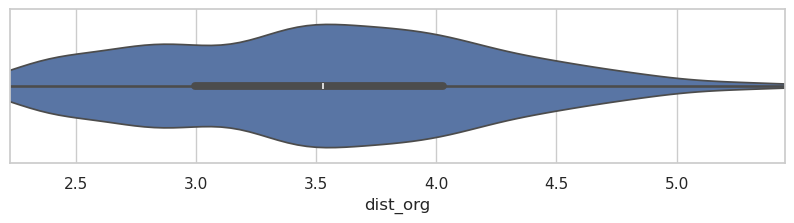

In [17]:
### Distribution de la distance chi-2

sns.set_theme(style="whitegrid",rc={"figure.figsize":(10,2)} )


a = X['dist_org']

print(a.describe())

# ax = sns.boxplot(x=a)
ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont coupées car postulées
ax.set_xlim(left=min(a), right=max(a))

plt.show()

In [18]:
### Individus proches du profil moyen
#  donc fréquents
i = X[X.dist_org<2.5]
print(len(i))
c_obs.loc[i[:10].index]

73


,age,gender,revenu_mensuel,lecture_journal,parti,generation,classe_revenu
id,,,,,,,
1,87,F,9410,trois-quatre fois par semaine,populiste,66-90,8000-9999
3,79,F,7515,trois-quatre fois par semaine,populiste,66-90,6000-7999
32,80,H,10325,trois-quatre fois par semaine,populiste,66-90,10000-11999
35,75,F,6504,trois-quatre fois par semaine,populiste,66-90,6000-7999
46,68,H,6566,le week-end,populiste,66-90,6000-7999
49,71,F,7810,trois-quatre fois par semaine,populiste,66-90,6000-7999
83,69,F,4401,trois-quatre fois par semaine,populiste,66-90,3000-4499
89,77,F,8493,le week-end,populiste,66-90,8000-9999
108,66,F,5061,le week-end,écologiste,66-90,4500-5999


In [19]:
### Individus moyennements distants du profil moyen
i = X[(X.dist_org>3.2) & (X.dist_org <3.7)]
print(len(i))
c_obs.loc[i[:10].index]

238


,age,gender,revenu_mensuel,lecture_journal,parti,generation,classe_revenu
id,,,,,,,
4,26,H,3376,le week-end,écologiste,26-35,3000-4499
9,22,F,2370,tous les jours,écologiste,18-25,0-2999
11,64,H,13895,tous les jours,populiste,56-65,12000-299999
19,65,F,3042,le week-end,écologiste,56-65,3000-4499
21,52,F,9622,le week-end,écologiste,46-55,8000-9999
24,63,H,5119,trois-quatre fois par semaine,populiste,56-65,4500-5999
25,72,F,3506,très rarement,gauche,66-90,3000-4499
26,89,H,6991,de temps en temps,gauche,66-90,6000-7999
29,60,F,9578,tous les jours,centre,56-65,8000-9999


In [20]:
### Individus très distants du profil moyen
#  donc rares
i = X[X.dist_org>4.8]
print(len(i))
c_obs.loc[i[:10].index]

28


,age,gender,revenu_mensuel,lecture_journal,parti,generation,classe_revenu
id,,,,,,,
8,21,H,3338,très rarement,gauche,18-25,3000-4499
36,23,H,1748,de temps en temps,gauche,18-25,0-2999
54,24,H,2822,de temps en temps,gauche,18-25,0-2999
58,25,H,3658,très rarement,gauche,18-25,3000-4499
67,37,H,9286,de temps en temps,droite,36-45,8000-9999
92,39,H,5685,de temps en temps,gauche,36-45,4500-5999
113,36,F,6962,très rarement,gauche,36-45,6000-7999
266,36,H,4653,très rarement,centre,36-45,4500-5999
299,39,F,5054,très rarement,gauche,36-45,4500-5999


## Inspection des modalités

In [21]:
### Profil moyen colonnes
moda_moy = np.ones(X.shape[0])/n
moda_moy[:10]


array([0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
       0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111])

In [22]:
#enelver la colonne 'dist-org'
df = X.iloc[:,:-1]
#somme en colonne
somme_col = np.sum(df.values,axis=0)
print(somme_col)
#poids des variables_modalités (points modalités)
poids_moda = somme_col/(n*p)
#distance à l'origine des points modalités
disto_moda = np.apply_along_axis(arr=df.values/somme_col,axis=0,func1d=lambda x:
np.sum(n*(x-moda_moy)**2))
#np
inertie_moda = poids_moda * disto_moda
#affichage
dfc = pd.DataFrame(np.transpose([poids_moda,disto_moda,inertie_moda]),index=df.columns,columns=['Poids','Disto','Inertie'])
dfc

[496 404 138 209 232 196 125 110 129  94 131 123 313 168 136 152 239 205]


,Poids,Disto,Inertie
F,0.137778,0.814516,0.112222
H,0.112222,1.227723,0.137778
de temps en temps,0.038333,5.521739,0.211667
le week-end,0.058056,3.306220,0.191944
tous les jours,0.064444,2.879310,0.185556
trois-quatre fois par semaine,0.054444,3.591837,0.195556
très rarement,0.034722,6.200000,0.215278
18-25,0.030556,7.181818,0.219444
26-35,0.035833,5.976744,0.214167
36-45,0.026111,8.574468,0.223889


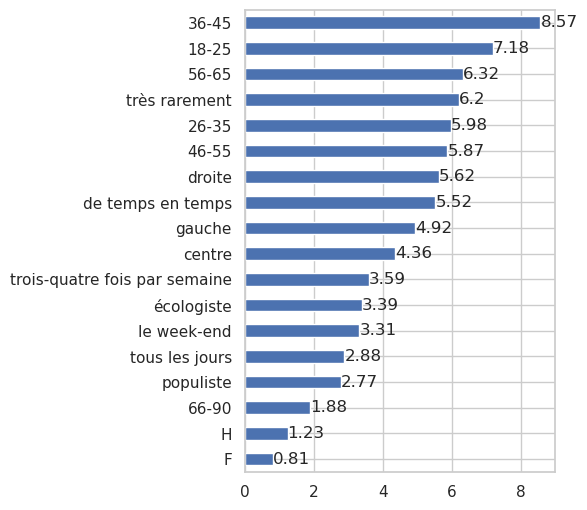

In [24]:
ax = round(dfc.Disto.sort_values(ascending=True),2).plot(kind='barh', 
                    figsize=(4,6))

ax.bar_label(ax.containers[0])

plt.show()

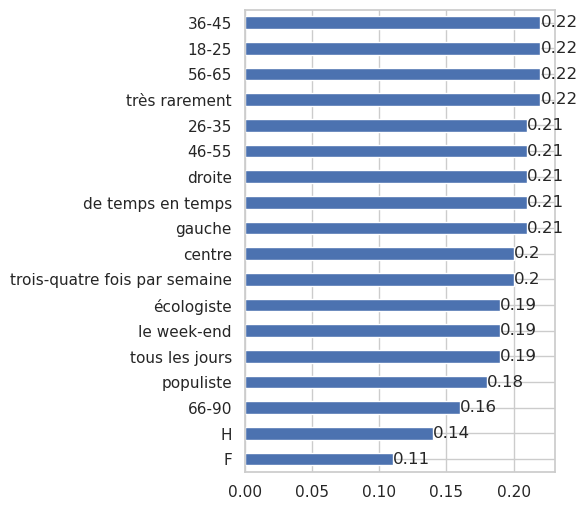

In [26]:
### Modalité qui contribuent le plus à l'inertie
# c'est-à-dire à la variation
ax = round(dfc.Inertie.sort_values(ascending=True),2).plot(kind='barh', 
                    figsize=(4,6))

ax.bar_label(ax.containers[0])

plt.show()

## Représentation graphique

In [27]:
acm = MCA(row_labels=DActives.index,var_labels=DActives.columns)
acm.fit(DActives.values)

MCA(row_labels=Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       891, 892, 893, 894, 895, 896, 897, 898, 899, 900],
      dtype='int64', name='id', length=900),
    var_labels=Index(['gender', 'lecture_journal', 'generation', 'parti'], dtype='object'))

In [28]:
eig = pd.DataFrame(acm.eig_).transpose()
eig.columns=['contribution','freq','freq_cumulee']

eig.head(), eig.tail()


(   contribution       freq  freq_cumulee
 0      0.361539  10.329672     10.329672
 1      0.336567   9.616214     19.945886
 2      0.304328   8.695099     28.640985
 3      0.281255   8.035847     36.676832
 4      0.263939   7.541106     44.217938,
     contribution      freq  freq_cumulee
 9       0.230362  6.581770     78.973772
 10      0.212363  6.067508     85.041280
 11      0.201837  5.766781     90.808062
 12      0.163394  4.668387     95.476449
 13      0.158324  4.523551    100.000000)

In [29]:
### Frequency
eig.iloc[:,1][:5]

0    10.329672
1     9.616214
2     8.695099
3     8.035847
4     7.541106
Name: freq, dtype: float64

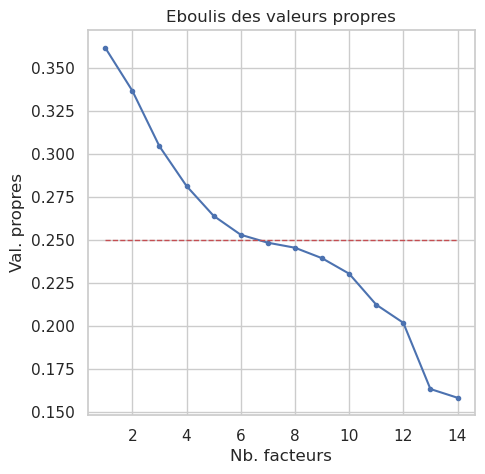

In [30]:
#éboulis des v.p.
fix,ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,Hmax+1),acm.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#seuil - Règle de Kaiser
ax.plot([1,Hmax],[1/p,1/p],"r--",linewidth=1)
plt.show()

*Diagramme d'éboulis*. Représentation graphique ayant pour but d'identifier un point d'inflexion dans une courbe de la variance. Le nom donné à ce type de graphique vient de la ressemblance de la courbe avec le profil des éboulis (scree) au bas d'une falaise. [DataFranca, Diagramme d'éboulis, 2024](https://datafranca.org/wiki/index.php?title=Diagramme_d%27%C3%A9boulis&oldid=93502)

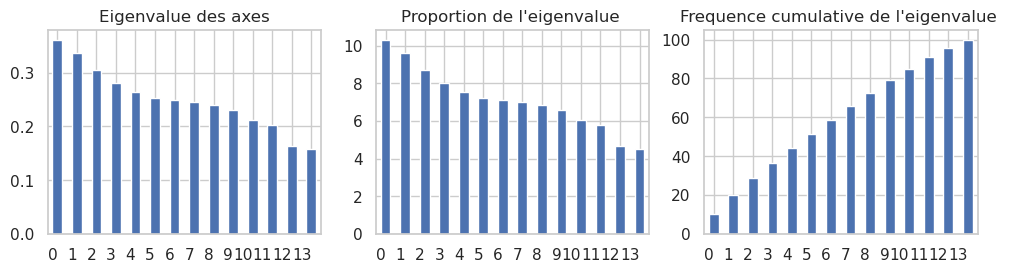

In [31]:
# https://www.statology.org/pandas-subplots/
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

eig.iloc[:,0].plot(kind='bar', ax=axes[0], title='Eigenvalue des axes')
eig.iloc[:,1].plot(kind='bar', ax=axes[1], title="Proportion de l'eigenvalue ")
eig.iloc[:,2].plot(kind='bar', ax=axes[2], title="Frequence cumulative de l'eigenvalue ")
# Met les valeurs xticks en vertical
fig.autofmt_xdate(rotation=0)
plt.show()

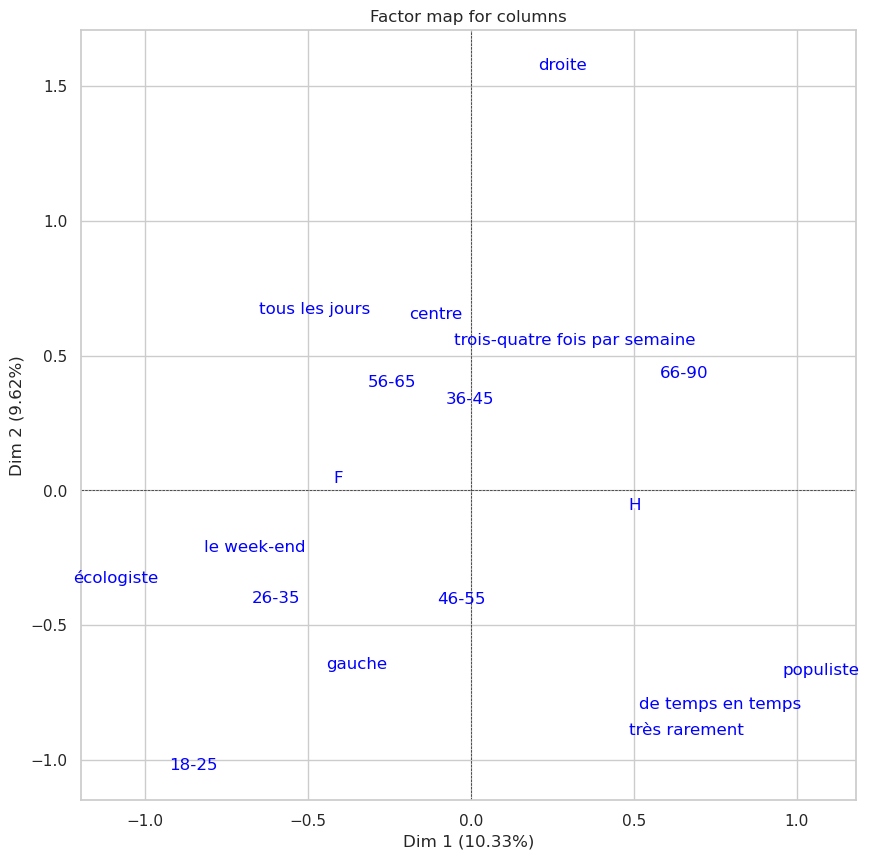

In [32]:
# Mapping des points colonnes
acm.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(10,10))

In [69]:
### Correction de Benzecri, cf. Rakotomalala, Pratique, p.313sqq

#somme en colonne
#récupérer les valeurs propres supérieur à (1/p)
lambada = acm.eig_[0][acm.eig_[0]>1/p]
print(lambada)

#appliquer la correction
lambada_prim = ((p/(p-1))*(lambada-1/p))**2
print(lambada_prim)

#faire la somme
S_prim = np.sum(lambada_prim)
print('u',S_prim)

#et produire les pourcentages
percent_prim = lambada_prim/S_prim*100

#affichage
bzc = pd.DataFrame(np.transpose(np.array([lambada_prim,percent_prim,
                                np.cumsum(percent_prim)])),columns=['Val.P','freq','Cumul_freq'],
                                index=range(1,len(percent_prim)+1))
print(bzc)

[0.36153852 0.33656749 0.30432847 0.28125464 0.26393872 0.25296497]
[2.21170495e-02 1.33225425e-02 5.24725883e-03 1.73662670e-03
 3.45400813e-04 1.56285334e-05]
u 0.04278450693859425
      Val.P       freq  Cumul_freq
1  0.022117  51.694062   51.694062
2  0.013323  31.138708   82.832770
3  0.005247  12.264390   95.097160
4  0.001737   4.059008   99.156168
5  0.000345   0.807303   99.963472
6  0.000016   0.036528  100.000000


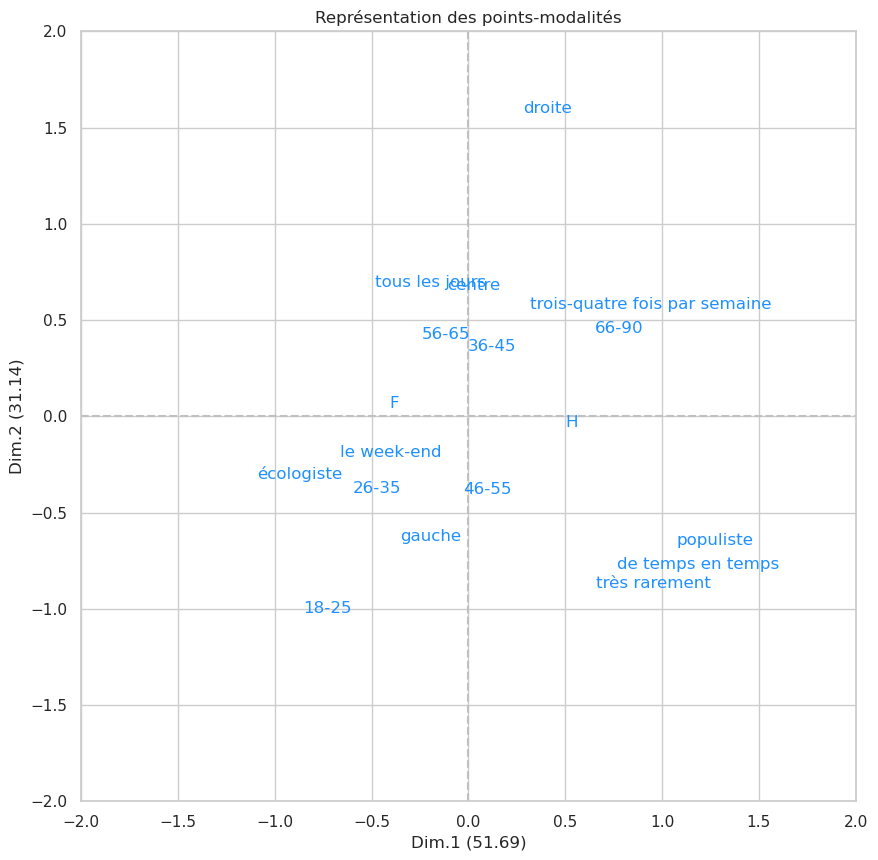

In [35]:
fix,ax = plt.subplots(figsize=(10,10))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 ("+ str(round(bzc.freq.iloc[0],2))+")")
ax.set_ylabel("Dim.2 ("+ str(round(bzc.freq.iloc[1],2))+")")
plt.title("Représentation des points-modalités")
for i in range(df.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
plt.show()

## Représenter les individus

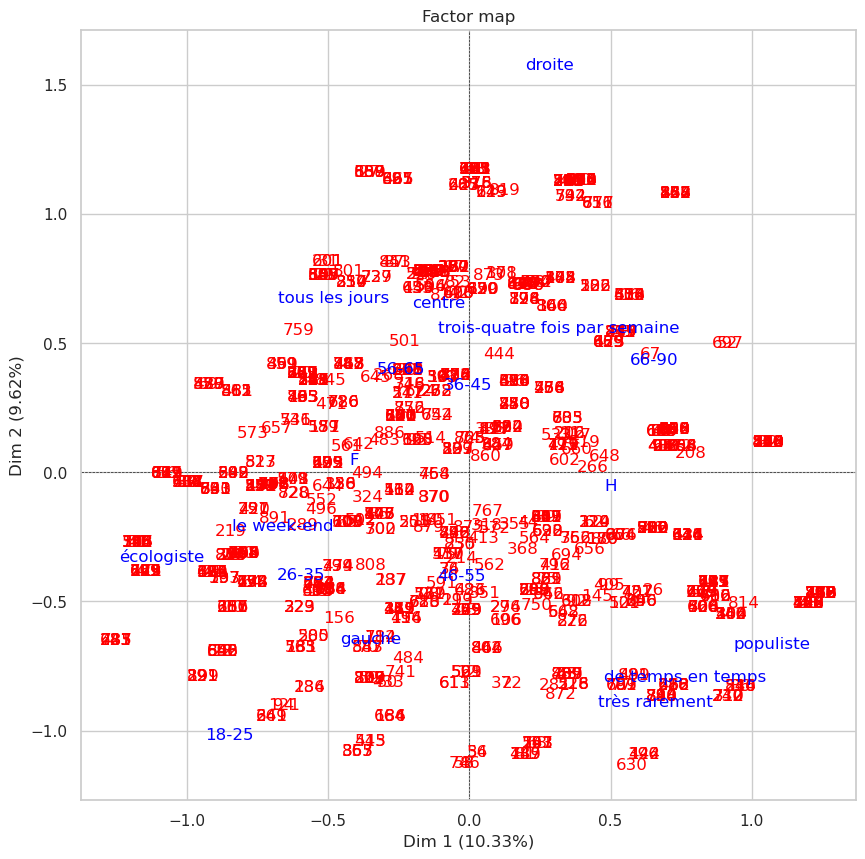

In [34]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
acm.mapping(num_x_axis=1, num_y_axis=2, figsize=(10,10), )

count    900.000000
mean       3.533978
std        0.689083
min        2.227000
25%        2.994600
50%        3.528500
75%        4.029000
max        5.450500
Name: dist_org, dtype: float64


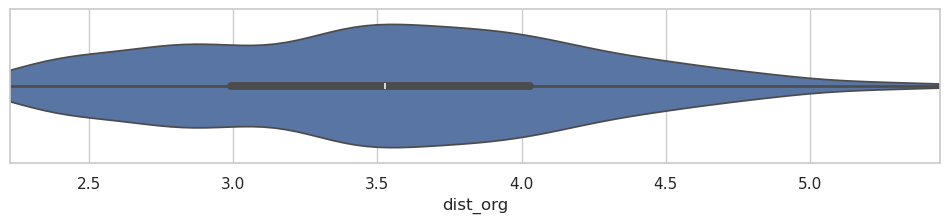

In [38]:

### Distribution des distances à l'individu moyen

sns.set_theme(style="whitegrid",rc={"figure.figsize":(12,2)} )


a = X['dist_org']

print(a.describe())

# ax = sns.boxplot(x=a)
ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont coupées car postulées
ax.set_xlim(left=min(a), right=max(a))

plt.show()

In [39]:
### Individus moyennements distants du profil moyen
sel = X[(X.dist_org>3.2) & (X.dist_org <3.7)]   ### [X.dist_org<2.5] proches du prof. m.
print(len(sel))
c_obs.loc[sel[:10].index]

238


,age,gender,revenu_mensuel,lecture_journal,parti,generation,classe_revenu
id,,,,,,,
4,26,H,3376,le week-end,écologiste,26-35,3000-4499
9,22,F,2370,tous les jours,écologiste,18-25,0-2999
11,64,H,13895,tous les jours,populiste,56-65,12000-299999
19,65,F,3042,le week-end,écologiste,56-65,3000-4499
21,52,F,9622,le week-end,écologiste,46-55,8000-9999
24,63,H,5119,trois-quatre fois par semaine,populiste,56-65,4500-5999
25,72,F,3506,très rarement,gauche,66-90,3000-4499
26,89,H,6991,de temps en temps,gauche,66-90,6000-7999
29,60,F,9578,tous les jours,centre,56-65,8000-9999


In [40]:
### Récupérer la position des lignes concernées
idl = [df.index.get_loc(e) for e in sel.index.to_list()]
idl[:5]


[3, 8, 10, 18, 20]

In [41]:
### Individus très distants du profil moyen
#  donc rares
seld = X[X.dist_org>4.8]
print(len(sel))
c_obs.loc[seld[:10].index]

238


,age,gender,revenu_mensuel,lecture_journal,parti,generation,classe_revenu
id,,,,,,,
8,21,H,3338,très rarement,gauche,18-25,3000-4499
36,23,H,1748,de temps en temps,gauche,18-25,0-2999
54,24,H,2822,de temps en temps,gauche,18-25,0-2999
58,25,H,3658,très rarement,gauche,18-25,3000-4499
67,37,H,9286,de temps en temps,droite,36-45,8000-9999
92,39,H,5685,de temps en temps,gauche,36-45,4500-5999
113,36,F,6962,très rarement,gauche,36-45,6000-7999
266,36,H,4653,très rarement,centre,36-45,4500-5999
299,39,F,5054,très rarement,gauche,36-45,4500-5999


In [42]:
### Récupérer la position des lignes concernées
idld = [df.index.get_loc(e) for e in seld.index.to_list()]
idld[:5]


[7, 35, 53, 57, 66]

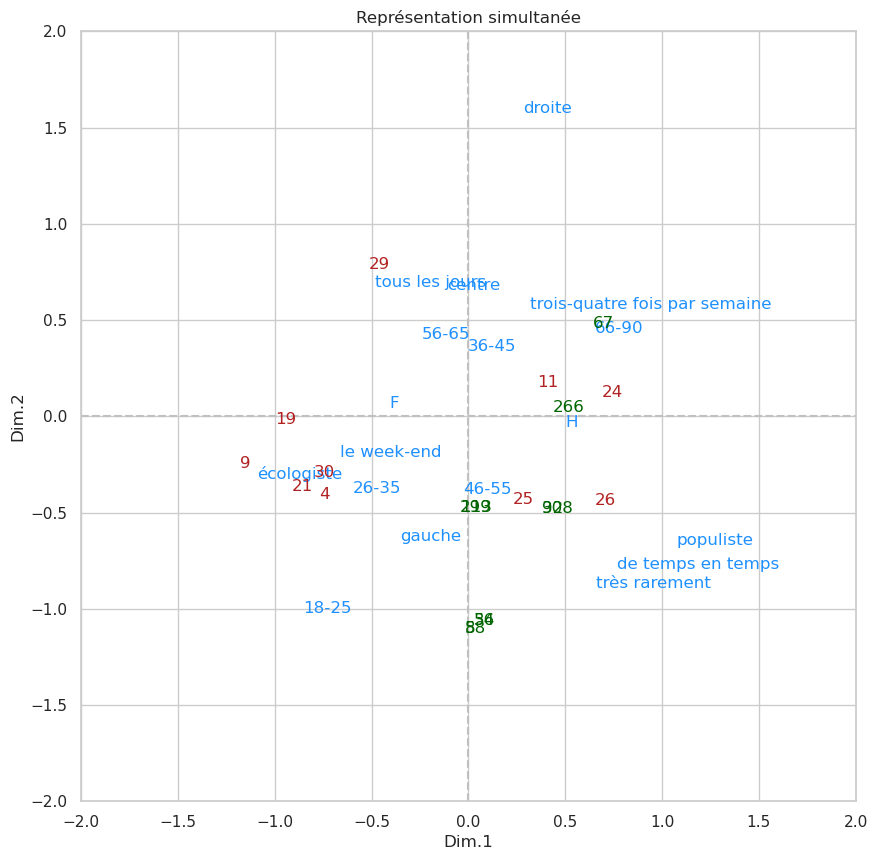

In [43]:
#représentation simultanée
fix,ax = plt.subplots(figsize=(10,10))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation simultanée")
for i in range(df.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],df.columns[i],color='dodgerblue')
for i in idl[:10]:
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],df.index[i],color='firebrick')
for i in idld[:10]:
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],df.index[i],color='DarkGreen')    
plt.show()

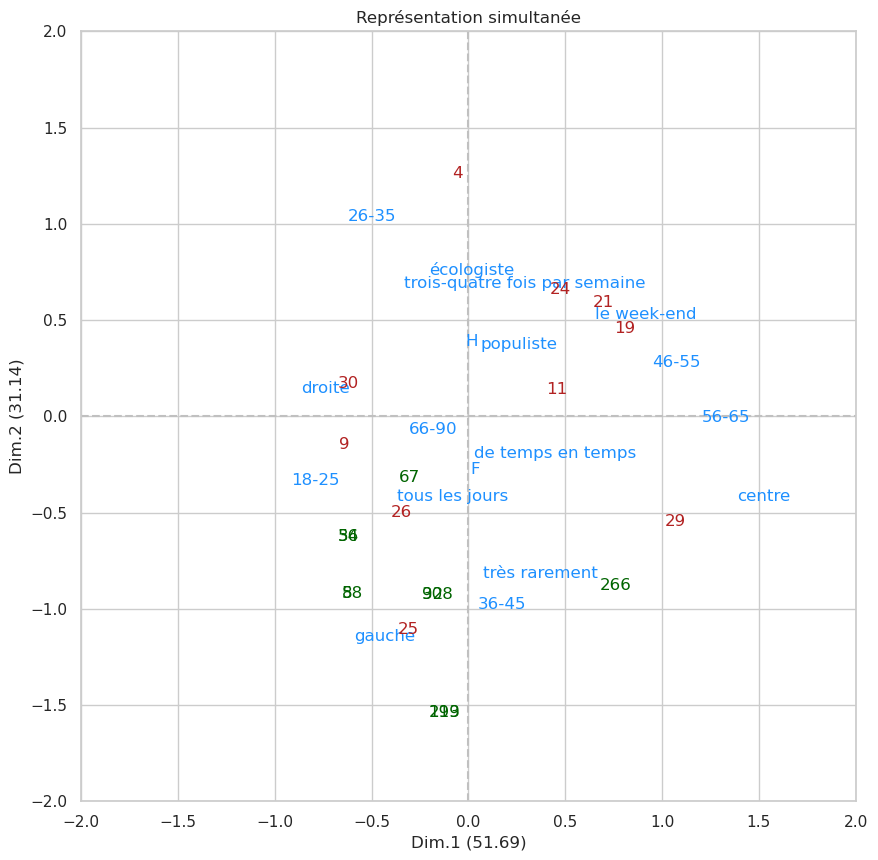

In [70]:
#représentation simultanée - relation quasi-barycentrique
fix,ax = plt.subplots(figsize=(10,10))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')

ax.set_xlabel("Dim.1 ("+ str(round(bzc.freq.iloc[0],2))+")")
ax.set_ylabel("Dim.2 ("+ str(round(bzc.freq.iloc[1],2))+")")

plt.title("Représentation simultanée")
for i in range(df.shape[1]):
    ax.text(acm.col_coord_[i,2],acm.col_coord_[i,3],df.columns[i],color='dodgerblue')
for i in idl[:10]:
    ax.text(acm.row_coord_[i,2],acm.row_coord_[i,3],df.index[i],color='firebrick')
for i in idld[:10]:
    ax.text(acm.row_coord_[i,2],acm.row_coord_[i,3],df.index[i],color='DarkGreen')    
plt.show()



### Filtrer les individus en fonction de leur contribution aux axes ou cosinus carrés (qualité de représentation)

Les individus les mieux représentés pour chaque facteur

In [51]:
### Ajouter la distance des individus à leur données
c_obs_pd_dist= pd.merge(c_obs, X.dist_org, left_index=True, right_index=True)
c_obs_pd_dist[:3]

,age,gender,revenu_mensuel,lecture_journal,parti,generation,classe_revenu,dist_org
id,,,,,,,,
1,87,F,9410,trois-quatre fois par semaine,populiste,66-90,8000-9999,2.3714
2,31,H,4466,de temps en temps,gauche,26-35,3000-4499,4.4712
3,79,F,7515,trois-quatre fois par semaine,populiste,66-90,6000-7999,2.3714


In [64]:
df_rows = acm.row_topandas()
# print(df_rows[:3])
print(df_rows.columns)

Index(['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4',
       'row_coord_dim5', 'row_coord_dim6', 'row_coord_dim7', 'row_coord_dim8',
       'row_coord_dim9', 'row_coord_dim10', 'row_coord_dim11',
       'row_coord_dim12', 'row_coord_dim13', 'row_coord_dim14',
       'row_contrib_dim1', 'row_contrib_dim2', 'row_contrib_dim3',
       'row_contrib_dim4', 'row_contrib_dim5', 'row_contrib_dim6',
       'row_contrib_dim7', 'row_contrib_dim8', 'row_contrib_dim9',
       'row_contrib_dim10', 'row_contrib_dim11', 'row_contrib_dim12',
       'row_contrib_dim13', 'row_contrib_dim14', 'row_cos2_dim1',
       'row_cos2_dim2', 'row_cos2_dim3', 'row_cos2_dim4', 'row_cos2_dim5',
       'row_cos2_dim6', 'row_cos2_dim7', 'row_cos2_dim8', 'row_cos2_dim9',
       'row_cos2_dim10', 'row_cos2_dim11', 'row_cos2_dim12', 'row_cos2_dim13',
       'row_cos2_dim14'],
      dtype='object')


### Filtre sur le cosinus

In [59]:
### Filtrer les individus
# Cosinus = qualité de représentation des points lignes
# On retient les individus les mieux représentés sur chaque axe
rc1 = df_rows.row_cos2_dim1.sort_values(ascending=False)[:3].index
print(rc1)
rc2 = df_rows.row_cos2_dim2.sort_values(ascending=False)[:3].index
print(rc2)
lrc = list(set(list(rc1) + list(rc2)))
### liste des positions, non des index!
lrc

Index([168, 292, 322], dtype='int64', name='id')
Index([61, 615, 131], dtype='int64', name='id')


[322, 131, 292, 615, 168, 61]

In [60]:
c_obs_pd_dist.iloc[lrc]

,age,gender,revenu_mensuel,lecture_journal,parti,generation,classe_revenu,dist_org
id,,,,,,,,
323,51,F,6531,le week-end,gauche,46-55,6000-7999,3.7317
132,72,H,8558,le week-end,écologiste,66-90,8000-9999,2.5287
293,32,F,4678,le week-end,écologiste,26-35,4500-5999,3.3731
616,54,F,4504,le week-end,écologiste,46-55,4500-5999,3.3470
169,60,F,8258,très rarement,gauche,56-65,8000-9999,4.6439
62,48,H,11858,tous les jours,populiste,46-55,10000-11999,3.1928


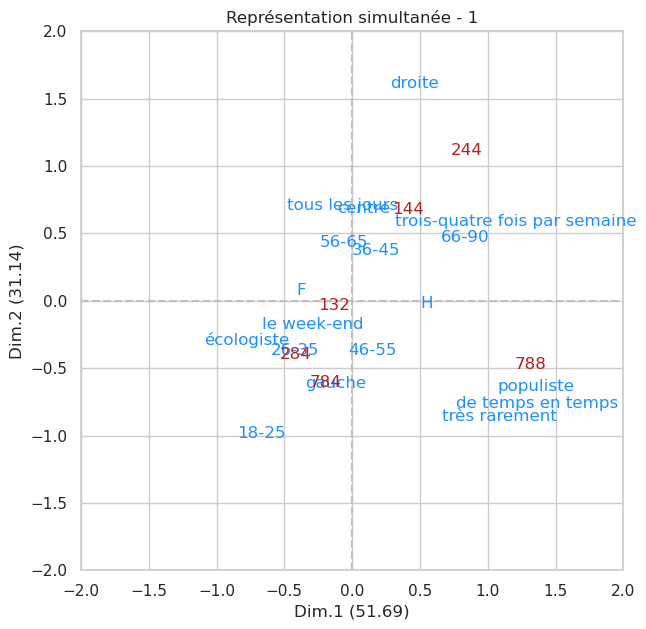

In [71]:
#représentation simultanée - relation quasi-barycentrique
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')

ax.set_xlabel("Dim.1 ("+ str(round(bzc.freq.iloc[0],2))+")")
ax.set_ylabel("Dim.2 ("+ str(round(bzc.freq.iloc[1],2))+")")


plt.title("Représentation simultanée - 1")
for i in range(df.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],df.columns[i],color='dodgerblue')
for i in lrc:
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],df.index[i],color='firebrick')
plt.show()

### Filtre sur la contribution, premier axe

In [83]:
### Filtrer les individus donnant la plus grande contribution à l'axe
# On retient les individus les mieux représentés sur chaque axe
rc1 = df_rows.row_contrib_dim1.sort_values(ascending=False)[:4].index
print(rc1)
rc2 = df_rows.row_contrib_dim2.sort_values(ascending=False)[:4].index
print(rc2)
lrc = list(set(list(rc1) + list(rc2)))
### liste des positions, non des index!
lrc

Index([243, 283, 787, 621], dtype='int64', name='id')
Index([131, 143, 783, 98], dtype='int64', name='id')


[98, 131, 621, 143, 783, 787, 243, 283]

In [114]:
### Filtrer les individus donnant la plus grande contribution à l'axe
# On retient les individus les mieux représentés sur chaque axe
rc1 = [[e,1] for e in df_rows.row_contrib_dim1.sort_values(ascending=False)[:4].index]
print(rc1)
rc2 = [[e,2] for e in df_rows.row_contrib_dim2.sort_values(ascending=False)[:4].index]
print(rc2)
lrc = list(set(list(rc1) + list(rc2)))
### liste des positions, non des index!
lrc

[[243, 1], [283, 1], [787, 1], [621, 1]]
[[131, 2], [143, 2], [783, 2], [98, 2]]


TypeError: unhashable type: 'list'

In [ ]:
### Filtrer les individus donnant la plus grande contribution à l'axe
# On retient les individus les mieux représentés sur chaque axe
rc1 = df_rows.row_contrib_dim1.sort_values(ascending=False)[:4].index
print(rc1)
rc2 = df_rows.row_contrib_dim2.sort_values(ascending=False)[:4].index
print(rc2)
lrc = list(set(list(rc1) + list(rc2)))
### liste des positions, non des index!
lrc

Index([243, 283, 787, 621], dtype='int64', name='id')
Index([131, 143, 783, 98], dtype='int64', name='id')


[98, 131, 621, 143, 783, 787, 243, 283]

In [92]:
print(c_obs_pd_dist.iloc[:2].index)

Index([1, 2], dtype='int64', name='id')


In [84]:
c_obs_pd_dist.iloc[lrc]

,age,gender,revenu_mensuel,lecture_journal,parti,generation,classe_revenu,dist_org
id,,,,,,,,
99,60,F,8594,de temps en temps,populiste,56-65,8000-9999,3.8637
132,72,H,8558,le week-end,écologiste,66-90,8000-9999,2.5287
622,61,H,8741,le week-end,populiste,56-65,8000-9999,3.4048
144,36,H,6115,trois-quatre fois par semaine,centre,36-45,6000-7999,4.5006
784,53,F,11271,de temps en temps,écologiste,46-55,10000-11999,3.9106
788,75,H,6445,très rarement,populiste,66-90,6000-7999,3.0339
244,67,H,14080,trois-quatre fois par semaine,droite,66-90,12000-299999,3.0909
284,50,H,6250,le week-end,écologiste,46-55,6000-7999,3.4488


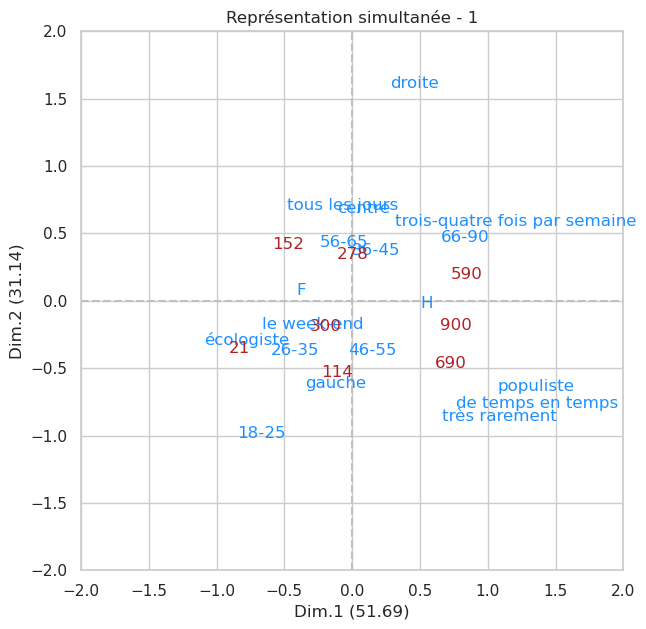

In [106]:
#représentation simultanée
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')

ax.set_xlabel("Dim.1 ("+ str(round(bzc.freq.iloc[0],2))+")")
ax.set_ylabel("Dim.2 ("+ str(round(bzc.freq.iloc[1],2))+")")

plt.title("Représentation simultanée - 1")
for i in range(df.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],df.columns[i],color='dodgerblue')
for i in lrc:
    ax.text(acm.row_coord_[i,0],acm.row_coord_[i,1],df.index[i],color='firebrick')
plt.show()

## Comparaison des axes


!!! Modifier les graphiques des facteurs (utiliser le code entièrement construit) pour afficher contribution des axes Benzecri et individus contribuant à l'axe



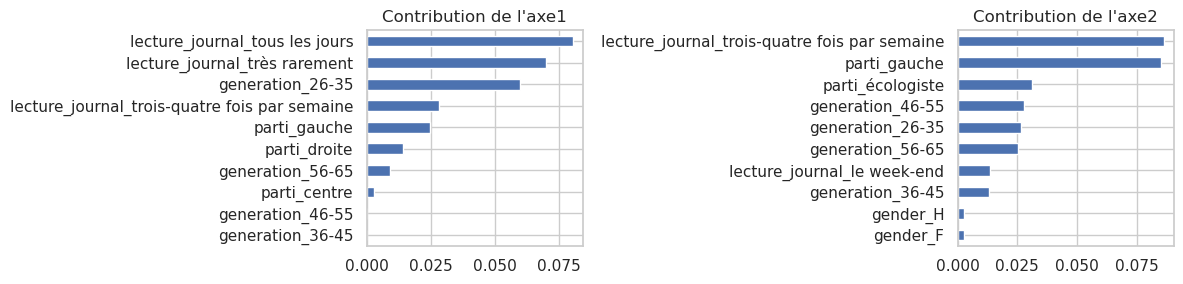

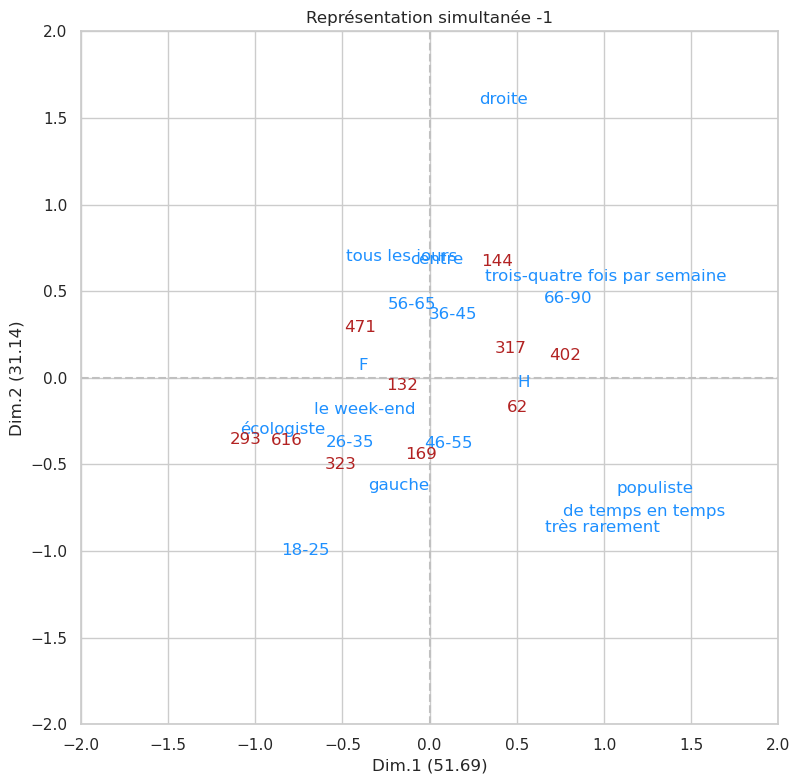

|   id |   age | gender   |   revenu_mensuel | lecture_journal               | parti      | generation   | classe_revenu   |   dist_org |
|-----:|------:|:---------|-----------------:|:------------------------------|:-----------|:-------------|:----------------|-----------:|
|  323 |    51 | F        |             6531 | le week-end                   | gauche     | 46-55        | 6000-7999       |     3.7317 |
|  132 |    72 | H        |             8558 | le week-end                   | écologiste | 66-90        | 8000-9999       |     2.5287 |
|  293 |    32 | F        |             4678 | le week-end                   | écologiste | 26-35        | 4500-5999       |     3.3731 |
|  616 |    54 | F        |             4504 | le week-end                   | écologiste | 46-55        | 4500-5999       |     3.347  |
|  169 |    60 | F        |             8258 | très rarement                 | gauche     | 56-65        | 8000-9999       |     4.6439 |
|  144 |    36 | H        |       

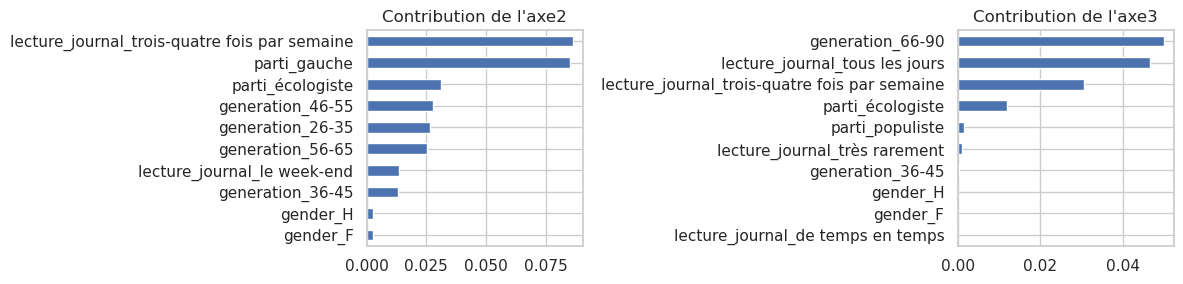

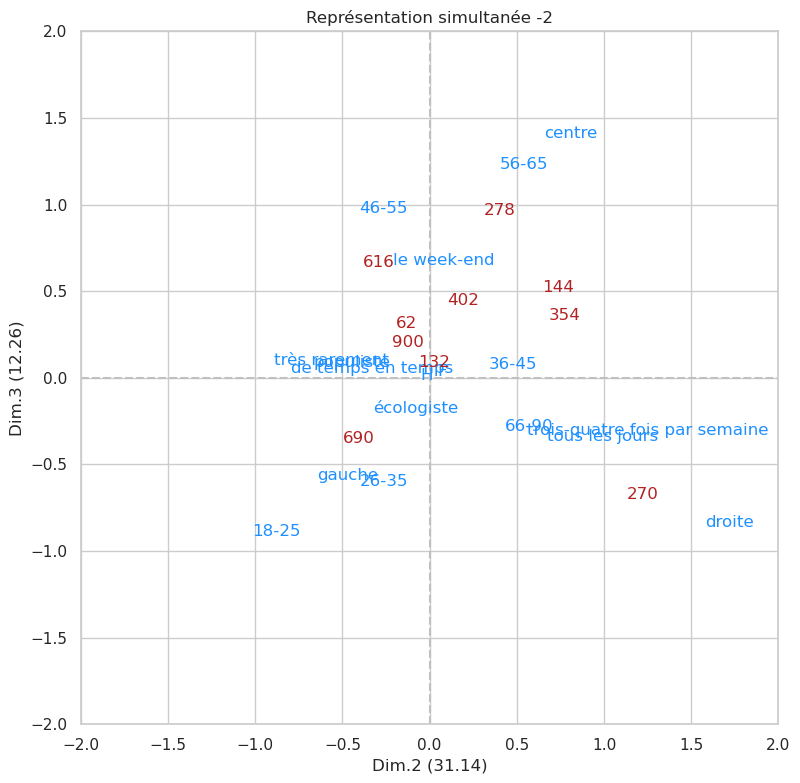

|   id |   age | gender   |   revenu_mensuel | lecture_journal               | parti      | generation   | classe_revenu   |   dist_org |
|-----:|------:|:---------|-----------------:|:------------------------------|:-----------|:-------------|:----------------|-----------:|
|  354 |    81 | H        |             5235 | trois-quatre fois par semaine | centre     | 66-90        | 4500-5999       |     2.8018 |
|  132 |    72 | H        |             8558 | le week-end                   | écologiste | 66-90        | 8000-9999       |     2.5287 |
|  900 |    83 | H        |             9330 | le week-end                   | populiste  | 66-90        | 8000-9999       |     2.3977 |
|  616 |    54 | F        |             4504 | le week-end                   | écologiste | 46-55        | 4500-5999       |     3.347  |
|  270 |    66 | H        |            10701 | tous les jours                | droite     | 66-90        | 10000-11999     |     2.9257 |
|  144 |    36 | H        |       

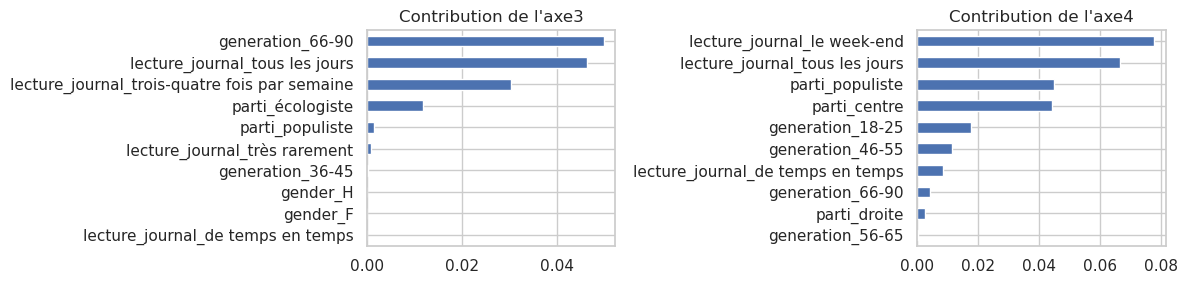

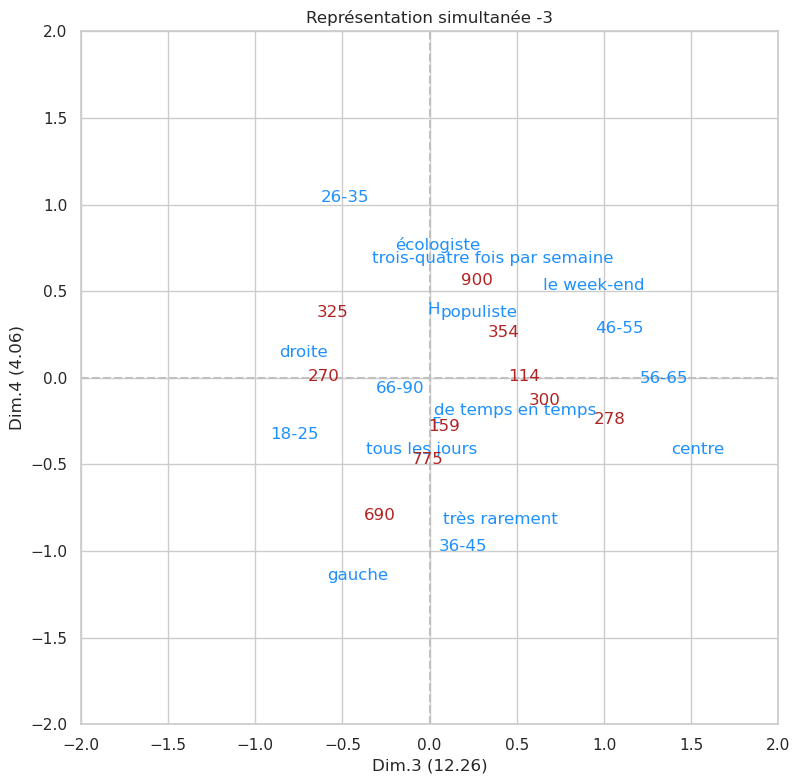

|   id |   age | gender   |   revenu_mensuel | lecture_journal               | parti      | generation   | classe_revenu   |   dist_org |
|-----:|------:|:---------|-----------------:|:------------------------------|:-----------|:-------------|:----------------|-----------:|
|  354 |    81 | H        |             5235 | trois-quatre fois par semaine | centre     | 66-90        | 4500-5999       |     2.8018 |
|  900 |    83 | H        |             9330 | le week-end                   | populiste  | 66-90        | 8000-9999       |     2.3977 |
|  325 |    18 | F        |             3614 | trois-quatre fois par semaine | écologiste | 18-25        | 3000-4499       |     3.7489 |
|  775 |    85 | F        |             6184 | le week-end                   | gauche     | 66-90        | 6000-7999       |     2.7717 |
|  300 |    59 | H        |             3840 | le week-end                   | gauche     | 56-65        | 3000-4499       |     3.957  |
|  270 |    66 | H        |       

In [115]:
# Mapping des points colonnes

i = 1


### avec la correction de Benzecri, 
# 3 axes apportent 95%  de l'information
while i < 4:    

    c1 = 'col_contrib_dim' + str(i)  
    c2 = 'col_contrib_dim' + str(1+i)

    c1 = 'col_cos2_dim' + str(i)  
    c2 = 'col_cos2_dim' + str(1+i)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

    r1 = dfc[c1].sort_values(ascending=True)[:10]
    r1.plot(kind='barh', ax=axes[0], title="Contribution de l'axe"+ str(i))

    r2 = dfc[c2].sort_values(ascending=True)[:10]
    r2.plot(kind='barh', ax=axes[1], title="Contribution de l'axe"+ str(i+1))

    plt.tight_layout()
    plt.show()


    # rc1 = 'row_contrib_dim' + str(i)  
    # rc2 = 'row_contrib_dim' + str(1+i)
    rc1 = 'row_cos2_dim' + str(i)  
    rc2 = 'row_cos2_dim' + str(1+i)

    ### Filtrer les individus donnant la plus grande contribution à l'axe
    # On retient les individus les mieux représentés sur chaque axe
    rcv1 = df_rows[rc1].sort_values(ascending=False)[:5].index
    rcv2 = df_rows[rc2].sort_values(ascending=False)[:5].index

    lrc = list(set(list(rcv1) + list(rcv2)))

    #représentation simultanée
    fix,ax = plt.subplots(figsize=(9,9))
    ax.axis([-2,+2,-2,+2])
    ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
    ax.plot([0,0],[-2,+2],color='silver',linestyle='--')

    ax.set_xlabel("Dim."+str(i)+" ("+ str(round(bzc.freq.iloc[(i-1)],2))+")")
    ax.set_ylabel("Dim."+str(i+1)+" ("+ str(round(bzc.freq.iloc[i],2))+")")

    plt.title("Représentation simultanée -" + str(i))
    for i1 in range(df.shape[1]):
        ax.text(acm.col_coord_[i1,(i-1)],acm.col_coord_[i1,i],df.columns[i1],color='dodgerblue')
    for i2 in lrc:
        ax.text(acm.row_coord_[i2,(i-1)],acm.row_coord_[i2,i],df.index[i2],color='firebrick')
    plt.show()

    print(c_obs_pd_dist.iloc[lrc].to_markdown())

    i +=1

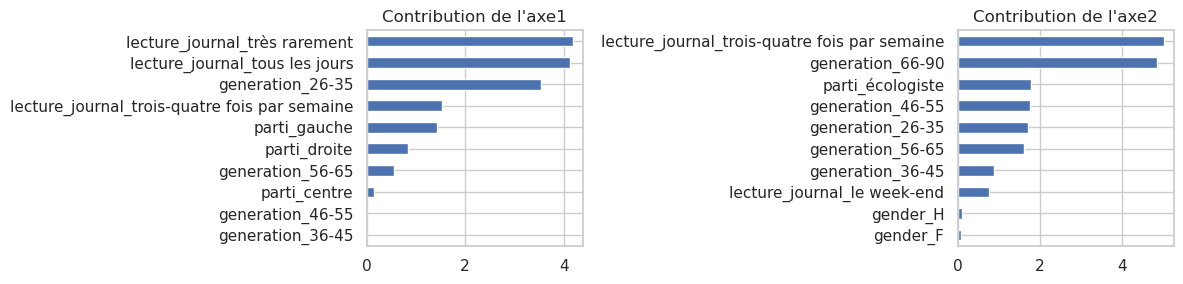

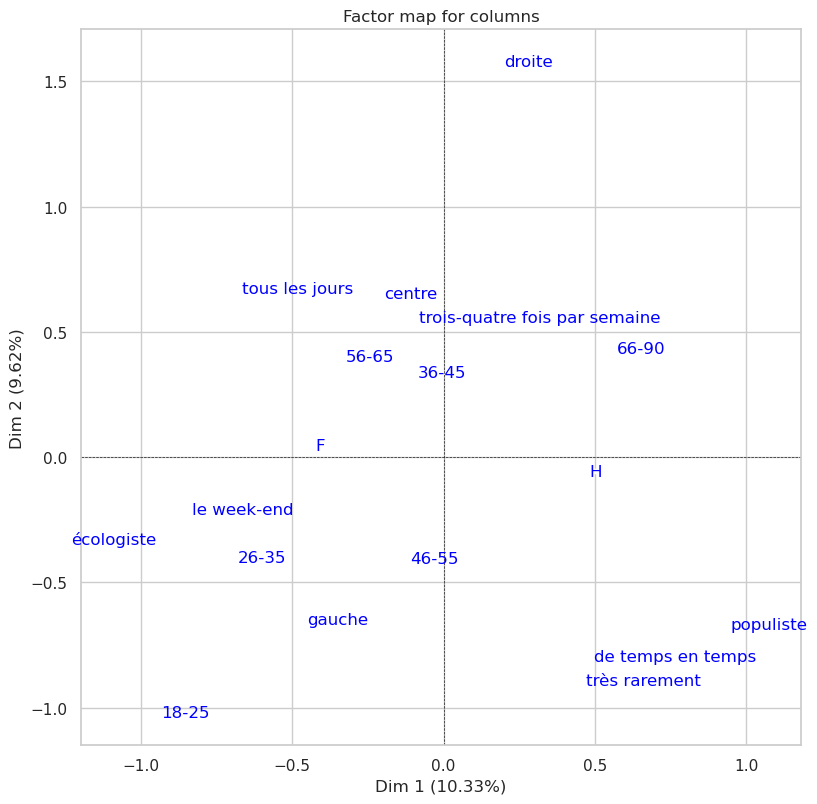

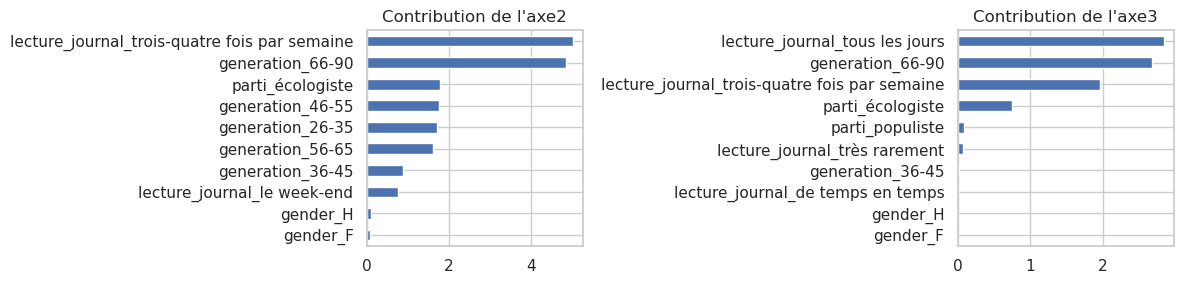

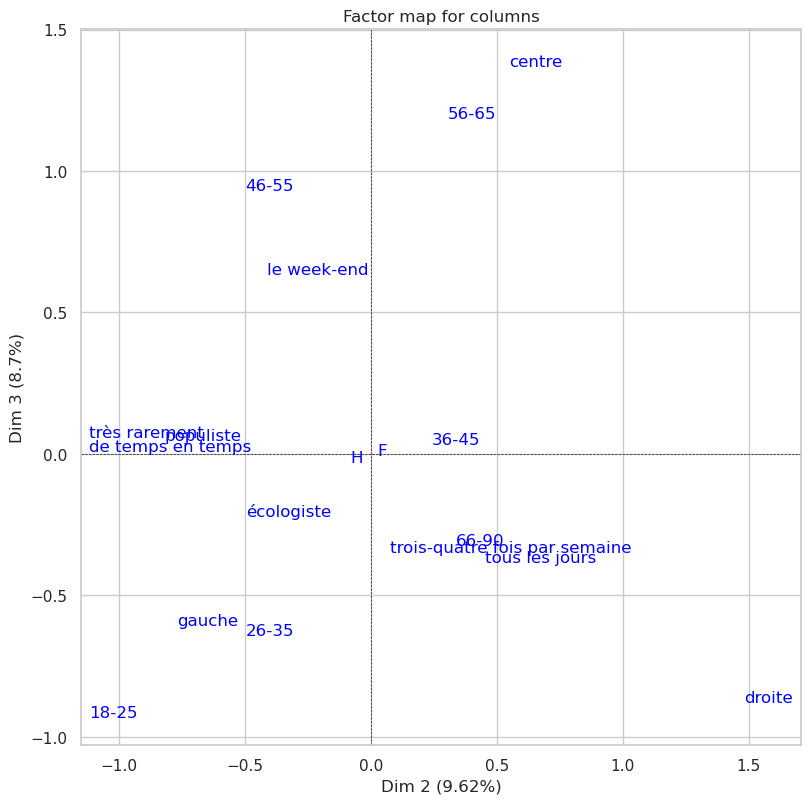

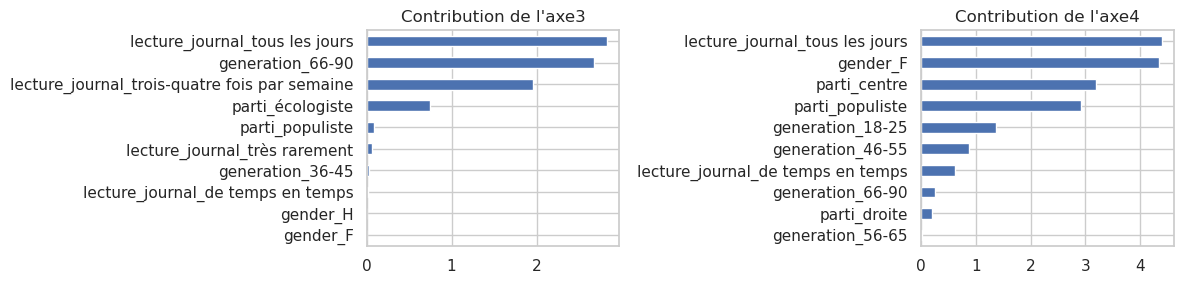

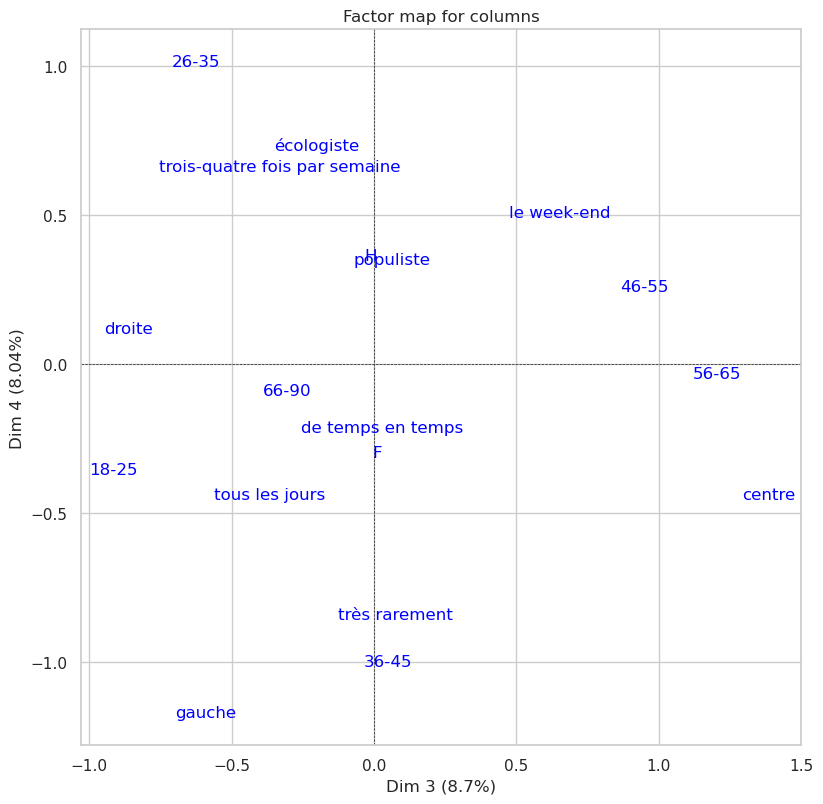

In [ ]:
# Mapping des points colonnes

i = 1

### adapter le paramètre si la figure 
# est trop petite ou trop grande
param = 0.9

dfc = acm.col_topandas()

### avec la correction de Benzecri, 
# 3 axes apportent 95%  de l'information
while i < 4:    
    c1 = 'col_contrib_dim' + str(i)  
    c2 = 'col_contrib_dim' + str(1+i)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

    r1 = dfc[c1].sort_values(ascending=True)[:10]
    r1.plot(kind='barh', ax=axes[0], title="Contribution de l'axe"+ str(i))

    r2 = dfc[c2].sort_values(ascending=True)[:10]
    r2.plot(kind='barh', ax=axes[1], title="Contribution de l'axe"+ str(i+1))

    plt.tight_layout()
    plt.show()

    w = eig.iloc[:,1][:i].values[0]*param
    h = eig.iloc[:,1][:(i+1)].values[0]*param
    
    acm.mapping_col(num_x_axis=i, num_y_axis=i+1, figsize=(w,h))
    plt.show()
    i +=1

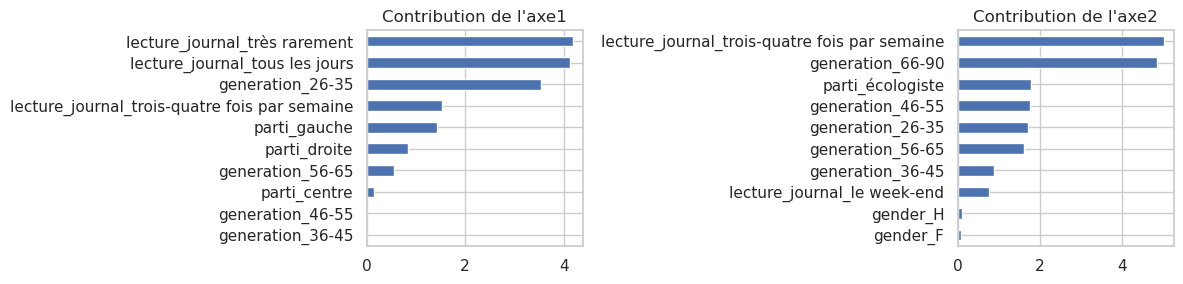

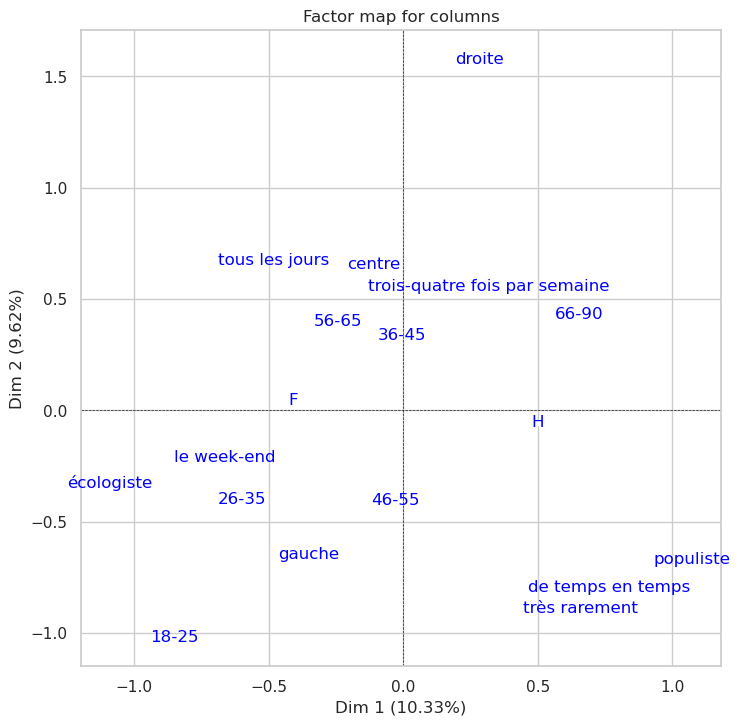

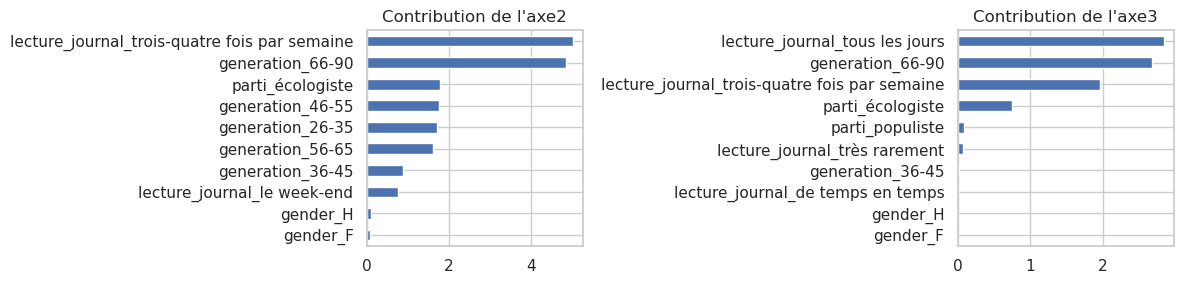

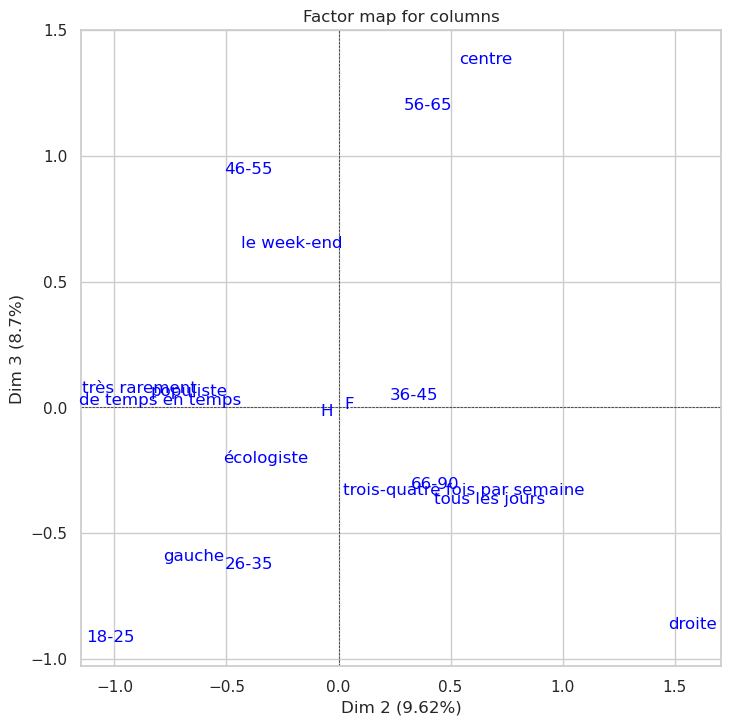

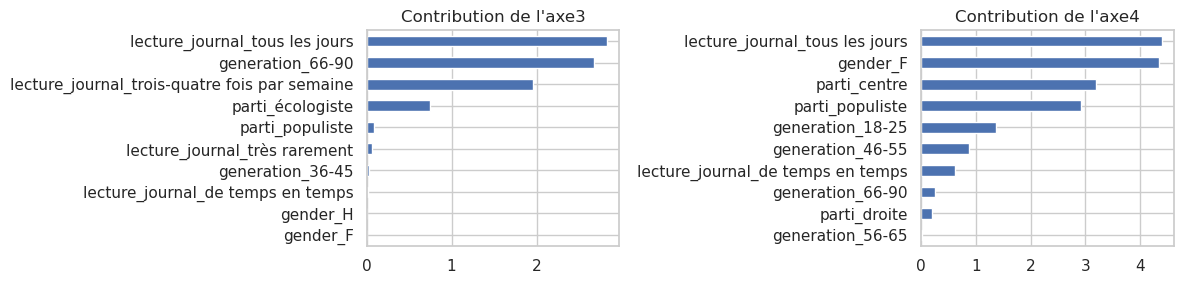

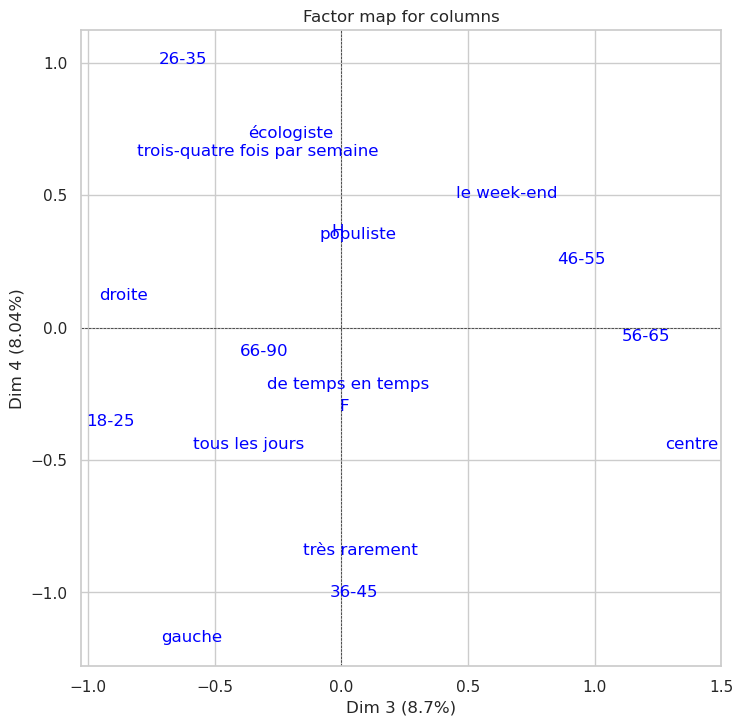

In [77]:
# Mapping des points colonnes

i = 1

### adapter le paramètre si la figure 
# est trop petite ou trop grande
param = 0.8

dfc = acm.col_topandas()


while i < 4:    
    c1 = 'col_contrib_dim' + str(i)  
    c2 = 'col_contrib_dim' + str(1+i)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

    r1 = dfc[c1].sort_values(ascending=True)[:10]
    r1.plot(kind='barh', ax=axes[0], title="Contribution de l'axe"+ str(i))

    r2 = dfc[c2].sort_values(ascending=True)[:10]
    r2.plot(kind='barh', ax=axes[1], title="Contribution de l'axe"+ str(i+1))

    plt.tight_layout()
    plt.show()

    w = eig.iloc[:,1][:i].values[0]*param
    h = eig.iloc[:,1][:(i+1)].values[0]*param
    
    acm.mapping_col(num_x_axis=i, num_y_axis=i+1, figsize=(w,h))
    plt.show()
    i +=1

### Variables illustratives qualitatives

Cf. Rakotomalala, Pratique de l'analyse factorielle, 5.3.8

In [80]:
dd = pd.DataFrame(acm.row_coord_[:,:2],index=X.index,columns=['F1','F2'])
dd['classe_revenu'] = c_obs.classe_revenu
dd.head()

,F1,F2,classe_revenu
id,,,
1,0.680688,0.158377,8000-9999
2,0.132050,-0.817786,3000-4499
3,0.680688,0.158377,6000-7999
4,-0.769125,-0.427126,3000-4499
5,0.351653,1.125949,3000-4499


In [81]:
#calcul des moyennes conditionnelles
GBar = pd.pivot_table(dd,values=['F1','F2'],index="classe_revenu",aggfunc='mean')
print(GBar)

                     F1        F2
classe_revenu                    
0-2999        -0.481079 -0.481235
10000-11999    0.157281  0.125077
12000-299999   0.114643  0.546795
3000-4499     -0.327303 -0.245700
4500-5999     -0.086722 -0.060268
6000-7999      0.214809  0.075124
8000-9999      0.199617  0.138388


IndexError: index 18 is out of bounds for axis 0 with size 18

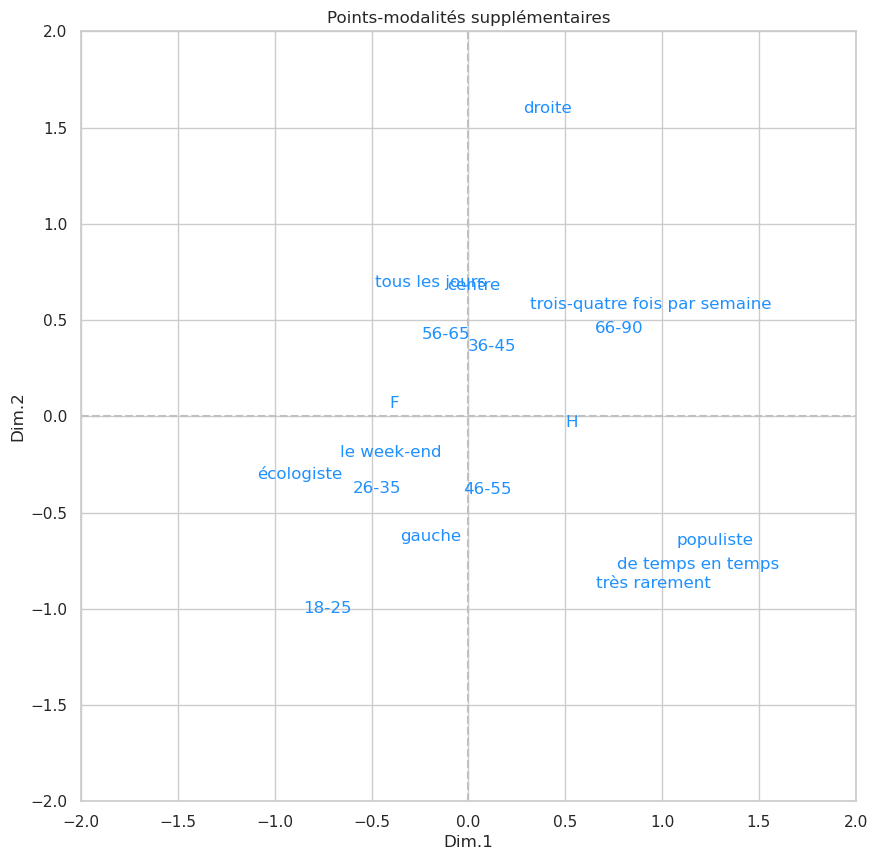

In [82]:
#représentation dans le plan
fix,ax = plt.subplots(figsize=(10,10))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Points-modalités supplémentaires")
#modalités actives
for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')
#modalités illustratives de la variable "fonction"
for i in GBar.index:
    ax.text(GBar[GBar.index==i].values[0][0]*3,GBar[GBar.index==i].values[0][1]*3,i,color='blue')
plt.show()

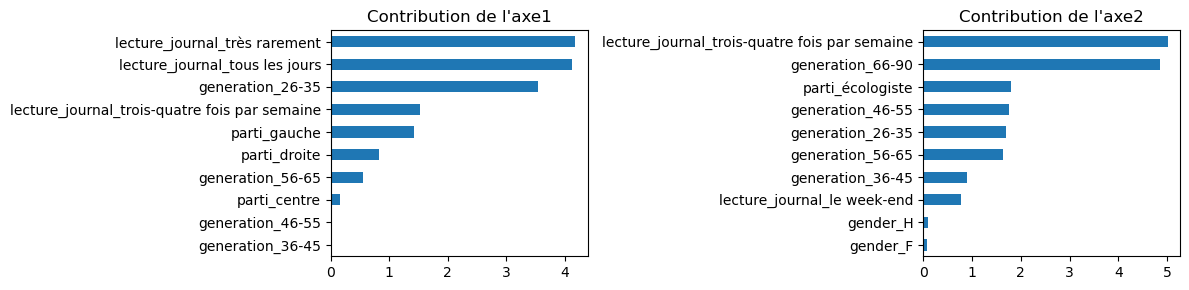

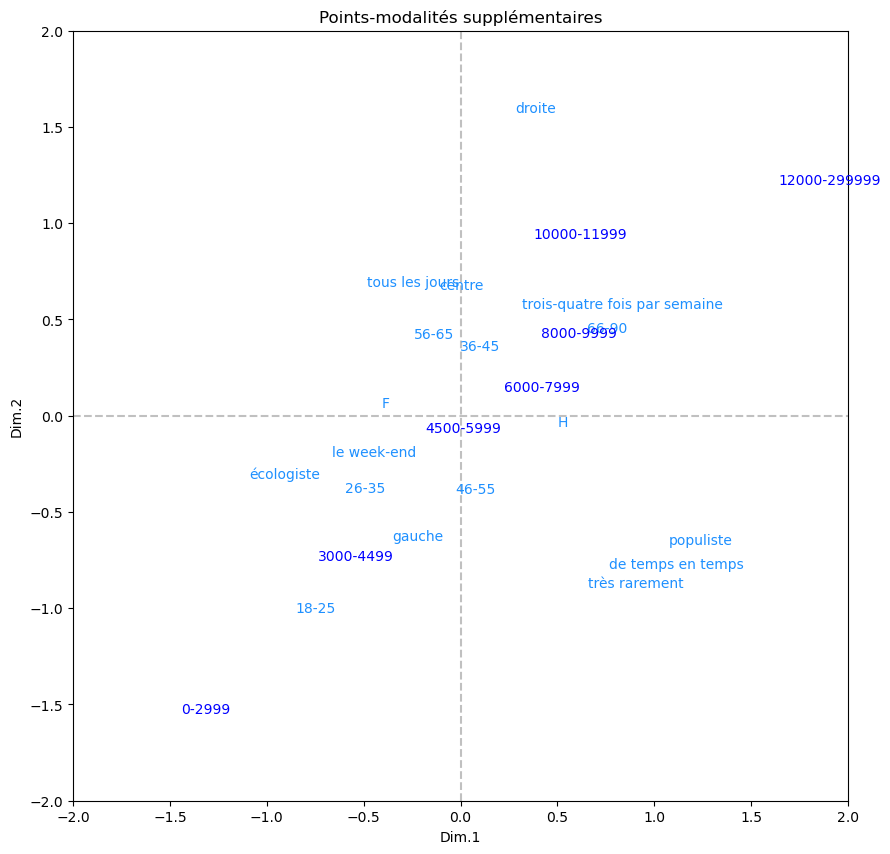

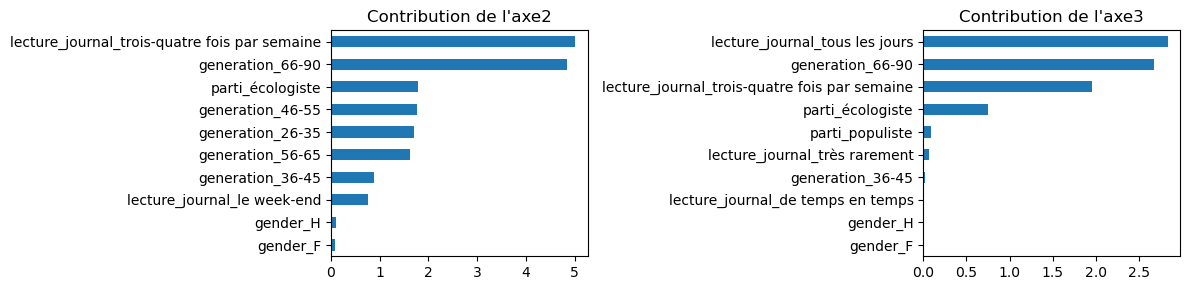

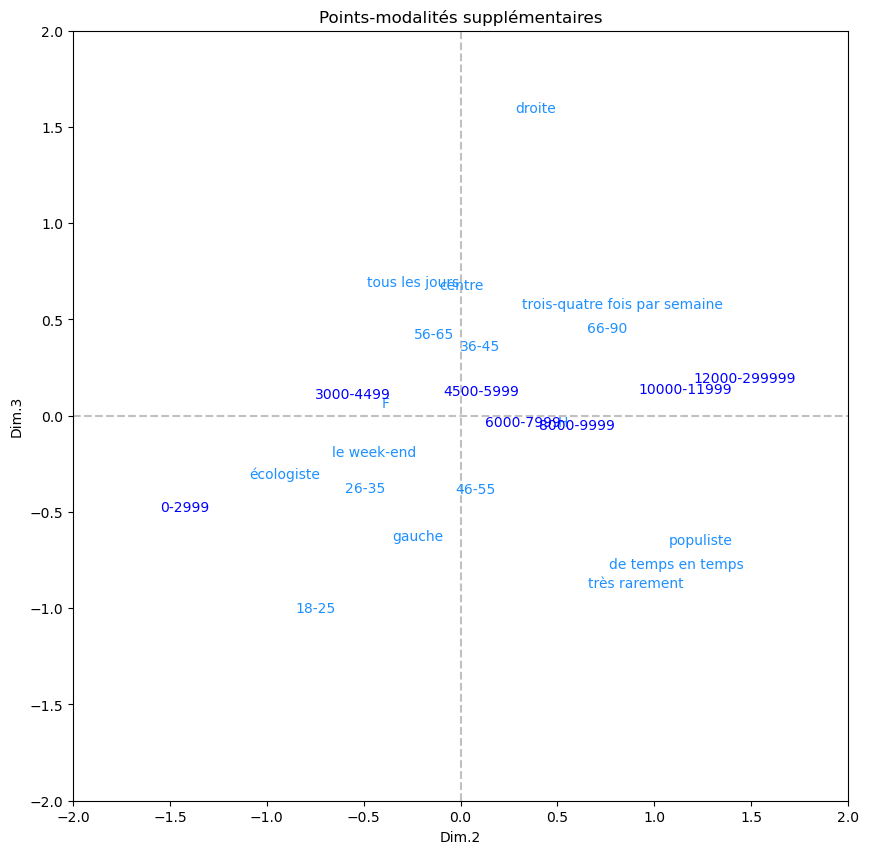

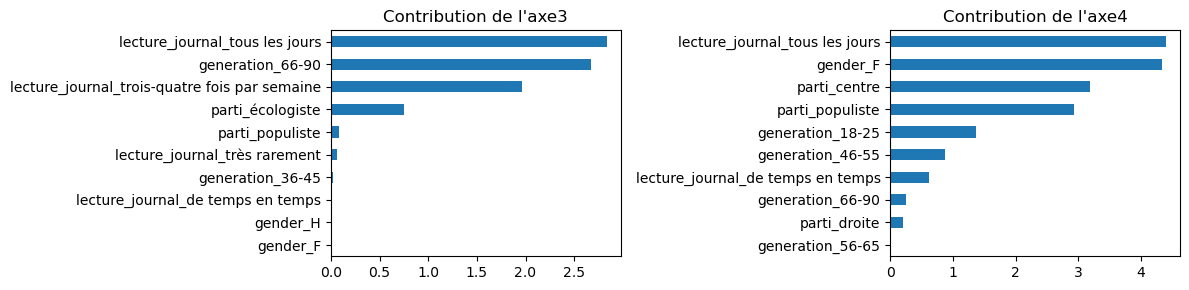

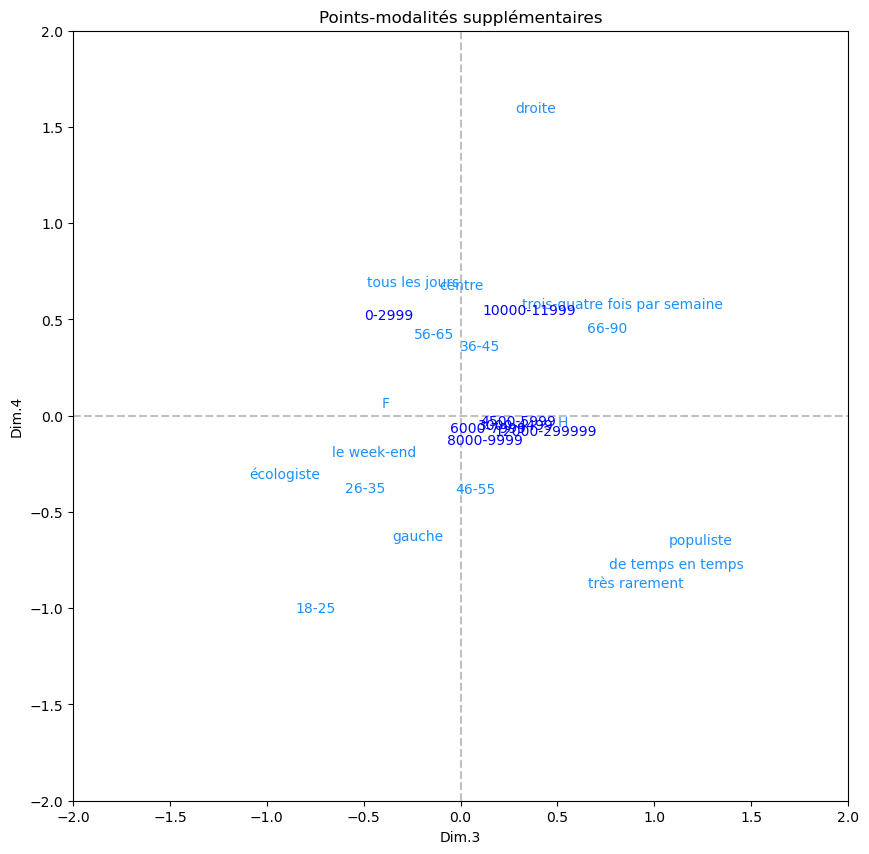

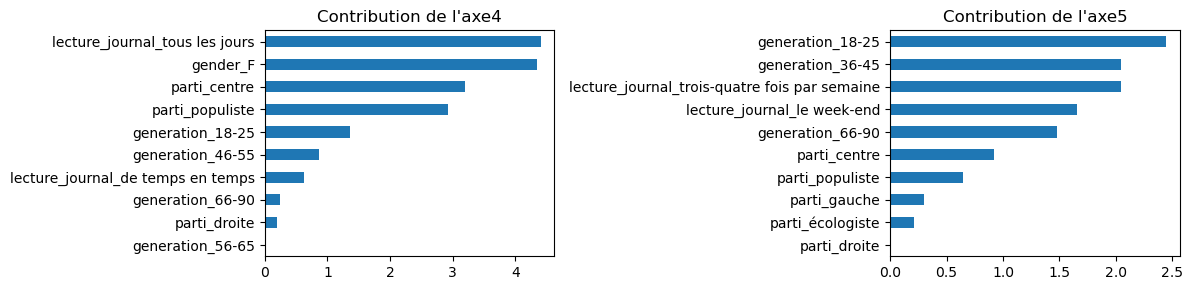

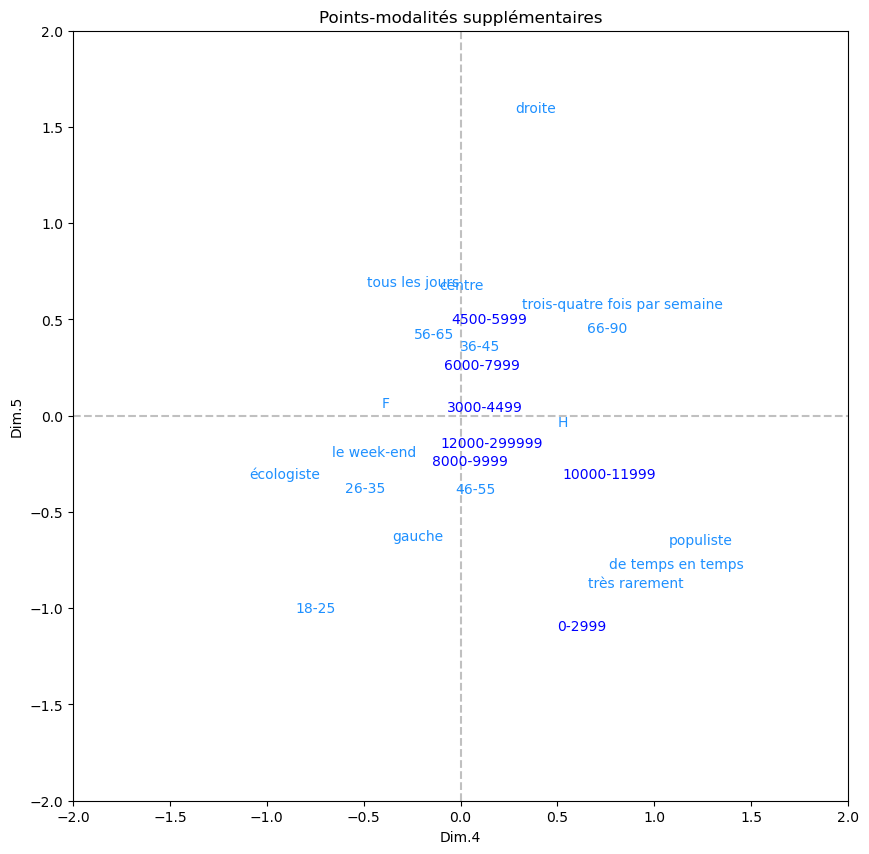

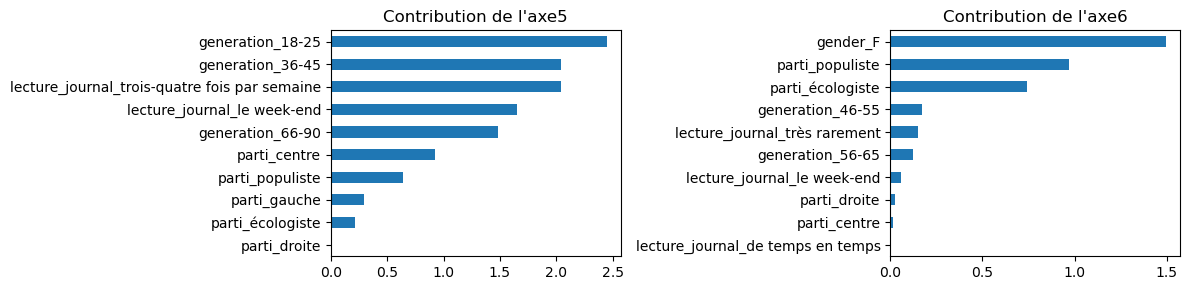

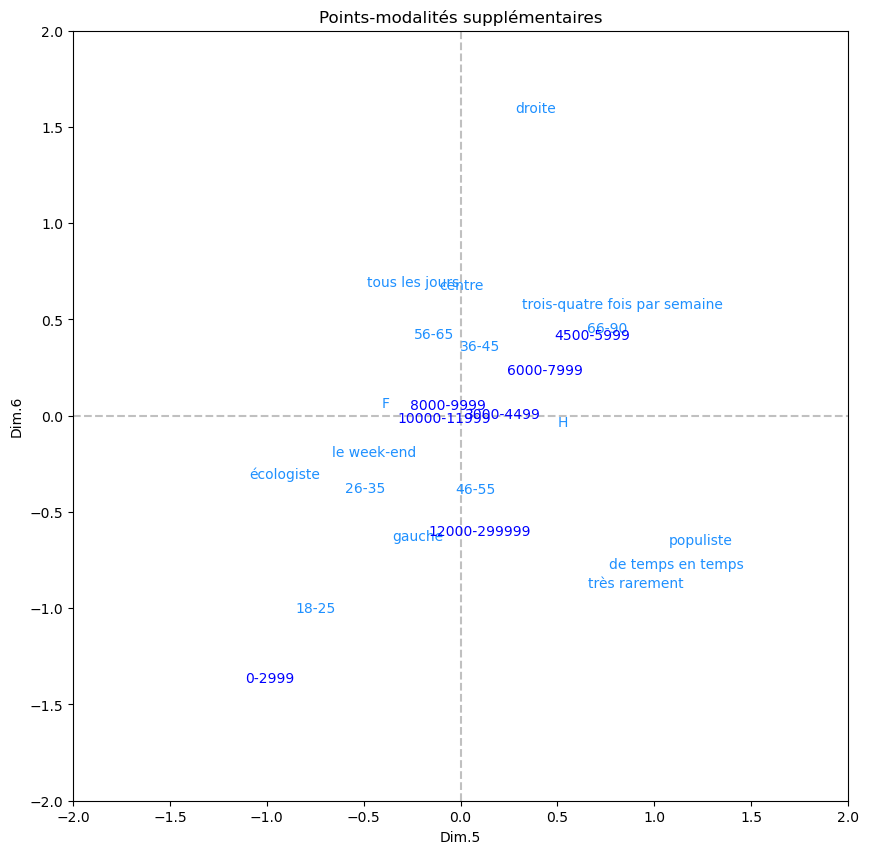

In [204]:
# Mapping des points colonnes

i = 1

### adapter le paramètre si la figure 
# est trop petite ou trop grande
param = 0.5

dfc = acm.col_topandas()


while i < 6:    
    c1 = 'col_contrib_dim' + str(i)  
    c2 = 'col_contrib_dim' + str(1+i)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

    r1 = dfc[c1].sort_values(ascending=True)[:10]
    r1.plot(kind='barh', ax=axes[0], title="Contribution de l'axe"+ str(i))

    r2 = dfc[c2].sort_values(ascending=True)[:10]
    r2.plot(kind='barh', ax=axes[1], title="Contribution de l'axe"+ str(i+1))

    plt.tight_layout()
    plt.show()

    #w = eig.iloc[:,1][:i].values[0]*param
    #h = eig.iloc[:,1][:(i+1)].values[0]*param
    

    dd = pd.DataFrame(acm.row_coord_[:,i:i+2],index=X.index,columns=['F'+str(i),'F'+str(i+1)])
    dd['classe_revenu'] = df.classe_revenu
    GBar = pd.pivot_table(dd,values=['F'+str(i),'F'+str(i+1)],index="classe_revenu",aggfunc='mean')
    
    fix,ax = plt.subplots(figsize=(10,10))
    ax.axis([-2,+2,-2,+2])
    ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
    ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
    ax.set_xlabel("Dim."+str(i))
    ax.set_ylabel("Dim."+str(i+1))
    plt.title("Points-modalités supplémentaires")
    #modalités actives
    for e in range(X.shape[1]):
        ax.text(acm.col_coord_[e,0],acm.col_coord_[e,1],X.columns[e],color='dodgerblue')
    #modalités illustratives de la variable "fonction"
    for l in GBar.index:
        ax.text(GBar[GBar.index==l].values[0][0]*3,GBar[GBar.index==l].values[0][1]*3,l,color='blue')
    plt.show()
    i +=1